# Packages

In [103]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime
from sklearn.metrics import mean_squared_error

# company list

In [10]:
companylist= pd.read_csv('companylist.csv', index_col=[0], sep=',')
companylist.head()

,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,Unnamed: 8
Symbol,,,,,,,,
VCVCU,10X Capital Venture Acquisition Corp,10.497,NaN,2020.0,Finance,Business Services,https://old.nasdaq.com/symbol/vcvcu,NaN
TXG,"10x Genomics, Inc.",149.640,$16.1B,2019.0,Capital Goods,Biotechnology: Laboratory Analytical Instruments,https://old.nasdaq.com/symbol/txg,NaN
YI,"111, Inc.",6.510,$536.16M,2018.0,Health Care,Medical/Nursing Services,https://old.nasdaq.com/symbol/yi,NaN
YQ,17 Education & Technology Group Inc.,14.610,$2.74B,2020.0,Consumer Services,Other Consumer Services,https://old.nasdaq.com/symbol/yq,NaN
TURN,180 Degree Capital Corp.,1.930,$60.06M,NaN,Finance,Finance/Investors Services,https://old.nasdaq.com/symbol/turn,NaN


# Read the stockprice data from the web

In [12]:
end_date = datetime.datetime(2019, 1, 1)
start_date = datetime.datetime(2012, 1, 1)

In [25]:
google= web.DataReader('GOOGL', 'yahoo', start_date, end_date)
ms= web.DataReader('MSFT', 'yahoo', start_date, end_date)
fb= web.DataReader('FB', 'yahoo', start_date, end_date)
ibm= web.DataReader('IBM', 'yahoo', start_date, end_date)

In [15]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


# Plot different parameters

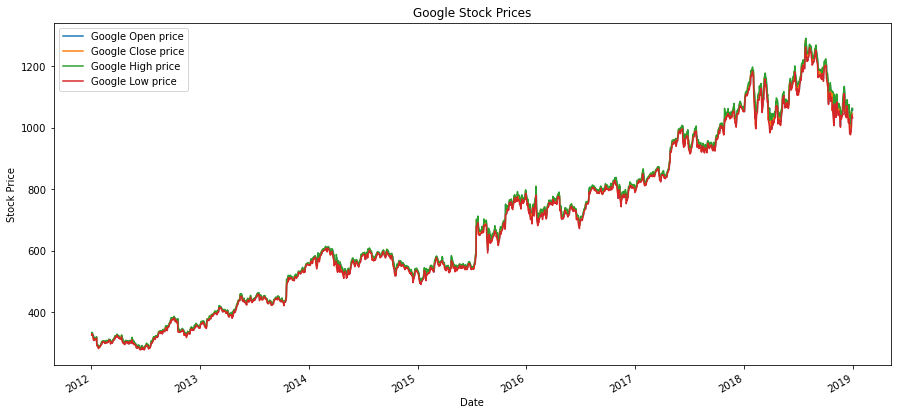

In [22]:
google['Open'].plot(label= 'Google Open price',figsize=(15,7))
google['Close'].plot(label='Google Close price')
google['High'].plot(label= 'Google High price')
google['Low'].plot(label = 'Google Low price')
plt.legend()
plt.title('Google Stock Prices')
plt.ylabel('Stock Price')
plt.show()

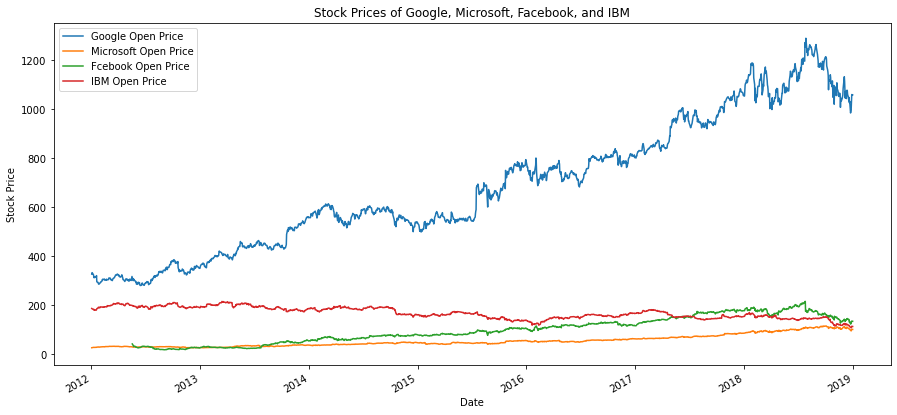

In [44]:
google['Open'].plot(label='Google Open Price', figsize=(15,7))
ms['Open'].plot(label='Microsoft Open Price')
fb['Open'].plot(label='Fcebook Open Price')
ibm['Open'].plot(label='IBM Open Price')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Stock Prices of Google, Microsoft, Facebook, and IBM')
plt.show()

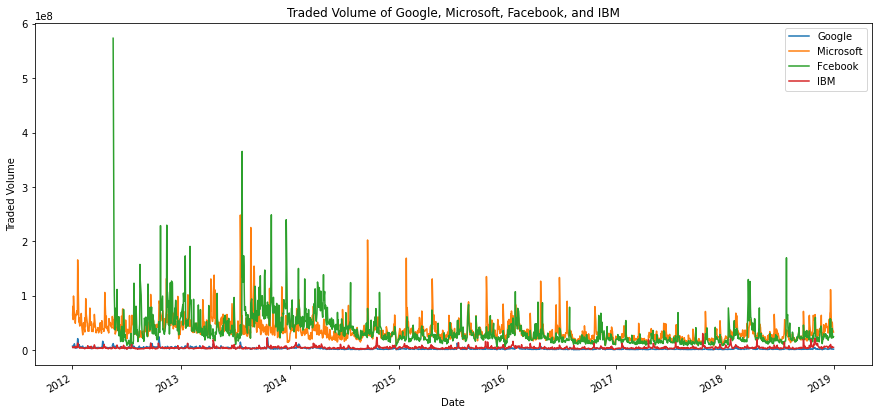

In [45]:
google['Volume'].plot(label='Google', figsize=(15,7))
ms['Volume'].plot(label='Microsoft')
fb['Volume'].plot(label='Fcebook')
ibm['Volume'].plot(label='IBM')
plt.legend()
plt.ylabel('Traded Volume')
plt.title('Traded Volume of Google, Microsoft, Facebook, and IBM')
plt.show()

# analysis of few parameters

In [28]:
google.iloc[[google['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-18,380.090088,338.338348,378.148163,347.847839,24859900.0,347.847839


<AxesSubplot:xlabel='Date'>

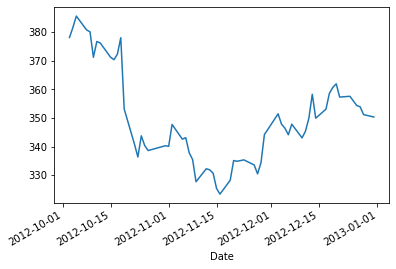

In [36]:
google.iloc[190:250]['Open'].plot()

In [47]:
google['Total Trade']= google['Volume']*google['Open']
fb['Total Trade'] = fb['Volume']*fb['Open']
ms['Total Trade'] = ms['Volume']*ms['Open']
ibm['Total Trade'] = ibm['Volume']*ibm['Open']

Text(0, 0.5, 'Total Trade')

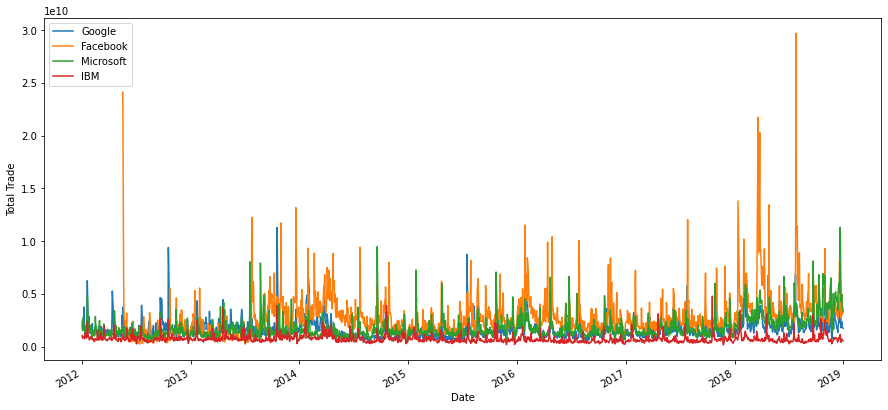

In [48]:
google['Total Trade'].plot(label = 'Google', figsize=(15,7))
fb['Total Trade'].plot(label = 'Facebook', figsize=(15,7))
ms['Total Trade'].plot(label = 'Microsoft', figsize=(15,7))
ibm['Total Trade'].plot(label = 'IBM', figsize=(15,7))
plt.legend()
plt.ylabel('Total Trade')

# curve smoothning 

<AxesSubplot:xlabel='Date'>

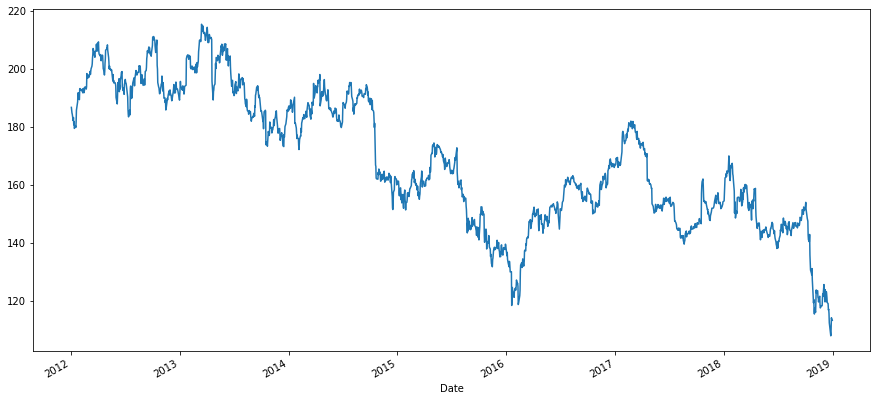

In [53]:
ibm['Open'].plot(figsize=(15,7))

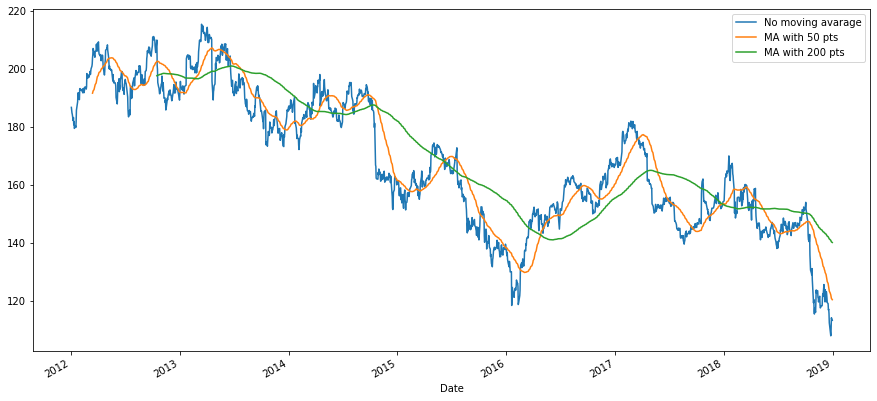

In [60]:
ibm['Open'].plot(label='No moving avarage', figsize= (15,7))
ibm['MA50']= ibm['Open'].rolling(50).mean()
ibm['MA200']= ibm['Open'].rolling(200).mean()
ibm['MA50'].plot(label='MA with 50 pts', figsize= (15,7))
ibm['MA200'].plot(label='MA with 200 pts', figsize= (15,7))
plt.legend()

# Correlatiton and scattering matrix 

In [62]:
from pandas.plotting import scatter_matrix

In [66]:
company= pd.concat([google['Open'], fb['Open'], ms['Open'], ibm['Open']], axis=1)
company.columns= ['Google Open', 'Facebook Open', 'Microsoft Open', 'IBM Open']
company.head()

,Google Open,Facebook Open,Microsoft Open,IBM Open
Date,,,,
2012-01-03,326.796783,NaN,26.549999,186.729996
2012-01-04,332.847839,NaN,26.820000,185.570007
2012-01-05,331.396393,NaN,27.379999,184.809998
2012-01-06,329.904907,NaN,27.530001,184.389999
2012-01-09,323.573578,NaN,28.049999,182.199997


array([[<AxesSubplot:xlabel='Google Open', ylabel='Google Open'>,
        <AxesSubplot:xlabel='Facebook Open', ylabel='Google Open'>,
        <AxesSubplot:xlabel='Microsoft Open', ylabel='Google Open'>,
        <AxesSubplot:xlabel='IBM Open', ylabel='Google Open'>],
       [<AxesSubplot:xlabel='Google Open', ylabel='Facebook Open'>,
        <AxesSubplot:xlabel='Facebook Open', ylabel='Facebook Open'>,
        <AxesSubplot:xlabel='Microsoft Open', ylabel='Facebook Open'>,
        <AxesSubplot:xlabel='IBM Open', ylabel='Facebook Open'>],
       [<AxesSubplot:xlabel='Google Open', ylabel='Microsoft Open'>,
        <AxesSubplot:xlabel='Facebook Open', ylabel='Microsoft Open'>,
        <AxesSubplot:xlabel='Microsoft Open', ylabel='Microsoft Open'>,
        <AxesSubplot:xlabel='IBM Open', ylabel='Microsoft Open'>],
       [<AxesSubplot:xlabel='Google Open', ylabel='IBM Open'>,
        <AxesSubplot:xlabel='Facebook Open', ylabel='IBM Open'>,
        <AxesSubplot:xlabel='Microsoft Open', ylabe

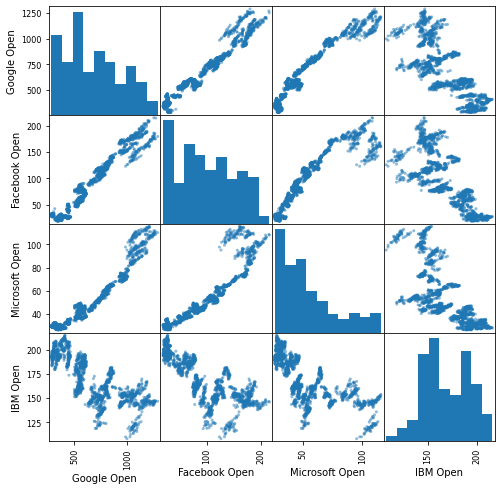

In [69]:
scatter_matrix(company, figsize=(8,8))
#scatter_matrix(company, figsize=(8,8), hist_kwds={'bins':50})

# Daily percentage change
$r_t = \frac{p_t}{p_{t-1}} -1$

In [71]:
google['return']= (google['Close']/google['Close'].shift(1)) -1
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,returns,return
Date,,,,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345600.0,333.038025,2.400518e+09,NaN,NaN
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722200.0,334.474487,1.904622e+09,0.004313,0.004313
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559200.0,329.834839,2.173695e+09,-0.013871,-0.013871
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380400.0,325.335327,1.775020e+09,-0.013642,-0.013642
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633500.0,311.541534,3.764293e+09,-0.042399,-0.042399


In [74]:
fb['return']= (fb['Close']/fb['Close'].shift(1))-1
ms['return']= (ms['Close']/ms['Close'].shift(1))-1
ibm['return']= (ibm['Close']/ibm['Close'].shift(1))-1

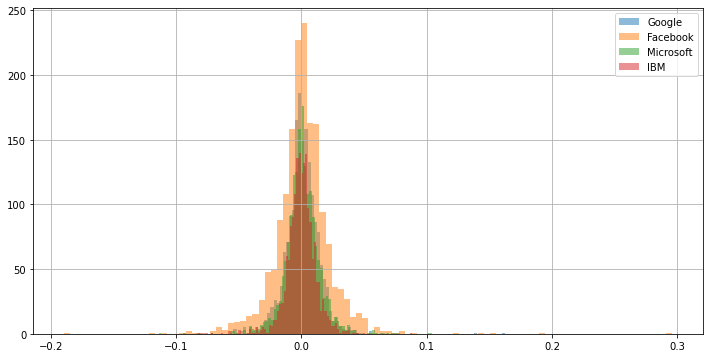

In [85]:
google['return'].hist(bins=100, label='Google', alpha= 0.5, figsize=(12,6))
fb['return'].hist(bins=100, label='Facebook', alpha= 0.5)
ms['return'].hist(bins=100, label='Microsoft', alpha= 0.5)
ibm['return'].hist(bins=100, label='IBM', alpha= 0.5)
plt.legend()

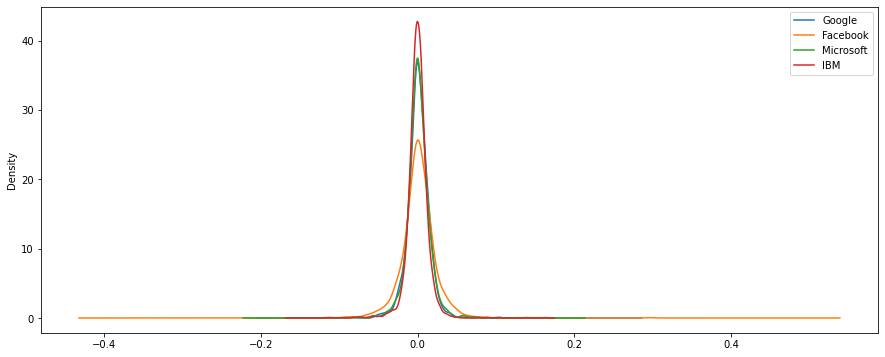

In [86]:
google['return'].plot(kind='kde', label='Google', figsize=(15,6))
fb['return'].plot(kind='kde', label='Facebook')
ms['return'].plot(kind='kde', label='Microsoft')
ibm['return'].plot(kind='kde', label='IBM')
plt.legend()
#this is normalized

In [89]:
company_return = pd.concat([google['return'],fb['return'],ms['return'], ibm['return']], axis=1)
company_return.columns= ['Google Return', 'Facebook Return', 'Microsoft Return', 'IBM Return']
company_return.head()

,Google Return,Facebook Return,Microsoft Return,IBM Return
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.004313,NaN,0.023534,-0.004079
2012-01-05,-0.013871,NaN,0.010219,-0.004743
2012-01-06,-0.013642,NaN,0.015535,-0.011481
2012-01-09,-0.042399,NaN,-0.013163,-0.005204


array([[<AxesSubplot:xlabel='Google Return', ylabel='Google Return'>,
        <AxesSubplot:xlabel='Facebook Return', ylabel='Google Return'>,
        <AxesSubplot:xlabel='Microsoft Return', ylabel='Google Return'>,
        <AxesSubplot:xlabel='IBM Return', ylabel='Google Return'>],
       [<AxesSubplot:xlabel='Google Return', ylabel='Facebook Return'>,
        <AxesSubplot:xlabel='Facebook Return', ylabel='Facebook Return'>,
        <AxesSubplot:xlabel='Microsoft Return', ylabel='Facebook Return'>,
        <AxesSubplot:xlabel='IBM Return', ylabel='Facebook Return'>],
       [<AxesSubplot:xlabel='Google Return', ylabel='Microsoft Return'>,
        <AxesSubplot:xlabel='Facebook Return', ylabel='Microsoft Return'>,
        <AxesSubplot:xlabel='Microsoft Return', ylabel='Microsoft Return'>,
        <AxesSubplot:xlabel='IBM Return', ylabel='Microsoft Return'>],
       [<AxesSubplot:xlabel='Google Return', ylabel='IBM Return'>,
        <AxesSubplot:xlabel='Facebook Return', ylabel='IBM Retur

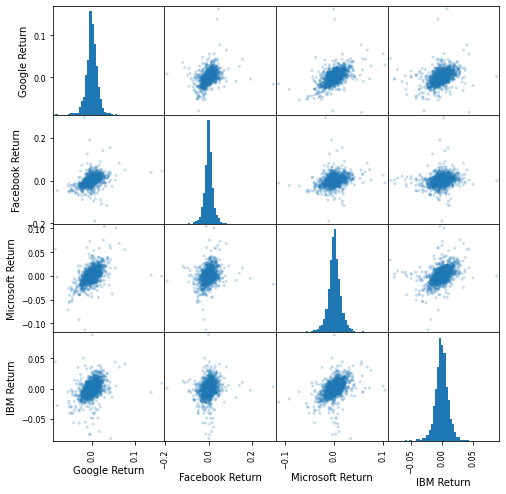

In [92]:
scatter_matrix(company_return, figsize=(8,8), hist_kwds={'bins':50},  alpha = 0.25)

# Cumulative Return

$i_i =(1+r_t) i_{t-1} = \frac{p_t}{p_{t-1}} i_{t-1} \\$
$r_t = \frac{p_t}{p_{t-1}} -1$

In [96]:
google['Cumulative return'] = (1 + google['return']).cumprod()
fb['Cumulative return']=(1+ fb['return']).cumprod()
ms['Cumulative return'] = (1 + ms['return']).cumprod()
ibm['Cumulative return']=(1+ ibm['return']).cumprod()
ibm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,MA45,return,Cumulative return
Date,,,,,,,,,,,,
2012-01-03,188.710007,186.000000,186.729996,186.300003,5646000.0,134.349426,1.054278e+09,NaN,NaN,NaN,NaN,NaN
2012-01-04,186.330002,184.940002,185.570007,185.539993,4346700.0,133.801376,8.066172e+08,NaN,NaN,NaN,-0.004079,0.995921
2012-01-05,185.029999,183.100006,184.809998,184.660004,4463100.0,133.166763,8.248255e+08,NaN,NaN,NaN,-0.004743,0.991197
2012-01-06,184.479996,182.309998,184.389999,182.539993,4897100.0,131.637955,9.029763e+08,NaN,NaN,NaN,-0.011481,0.979817
2012-01-09,182.270004,180.270004,182.199997,181.589996,5201200.0,130.952866,9.476586e+08,NaN,NaN,NaN,-0.005204,0.974718


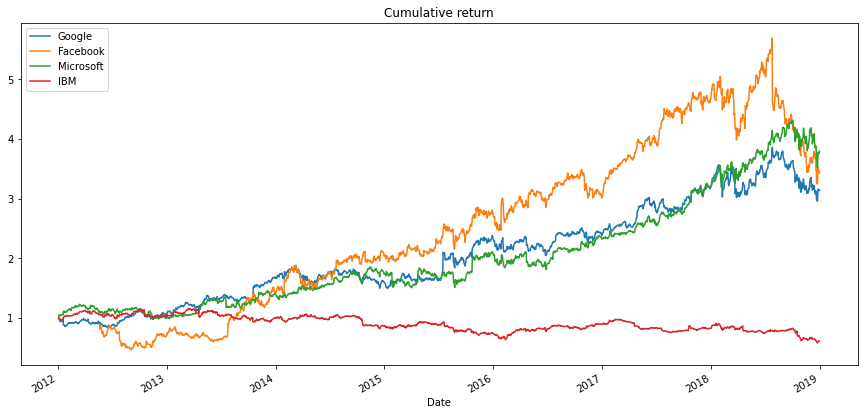

In [97]:
google['Cumulative return'].plot(label= 'Google', figsize= (15,7))
fb['Cumulative return'].plot(label='Facebook')
ms['Cumulative return'].plot(label='Microsoft')
ibm['Cumulative return'].plot(label='IBM')
plt.title('Cumulative return')
plt.legend()

In [98]:
company_cumulative_return = pd.concat([google['Cumulative return'],fb['Cumulative return'],ms['Cumulative return'], ibm['Cumulative return']], axis=1)
company_cumulative_return.columns= ['Google Cumulative Return', 'Facebook Cumulative Return', 'Microsoft Cumulative Return', 'IBM Cumulative Return']
company_cumulative_return.head()

,Google Cumulative Return,Facebook Cumulative Return,Microsoft Cumulative Return,IBM Cumulative Return
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,1.004313,NaN,1.023534,0.995921
2012-01-05,0.990382,NaN,1.033993,0.991197
2012-01-06,0.976871,NaN,1.050056,0.979817
2012-01-09,0.935453,NaN,1.036235,0.974718


array([[<AxesSubplot:xlabel='Google Cumulative Return', ylabel='Google Cumulative Return'>,
        <AxesSubplot:xlabel='Facebook Cumulative Return', ylabel='Google Cumulative Return'>,
        <AxesSubplot:xlabel='Microsoft Cumulative Return', ylabel='Google Cumulative Return'>,
        <AxesSubplot:xlabel='IBM Cumulative Return', ylabel='Google Cumulative Return'>],
       [<AxesSubplot:xlabel='Google Cumulative Return', ylabel='Facebook Cumulative Return'>,
        <AxesSubplot:xlabel='Facebook Cumulative Return', ylabel='Facebook Cumulative Return'>,
        <AxesSubplot:xlabel='Microsoft Cumulative Return', ylabel='Facebook Cumulative Return'>,
        <AxesSubplot:xlabel='IBM Cumulative Return', ylabel='Facebook Cumulative Return'>],
       [<AxesSubplot:xlabel='Google Cumulative Return', ylabel='Microsoft Cumulative Return'>,
        <AxesSubplot:xlabel='Facebook Cumulative Return', ylabel='Microsoft Cumulative Return'>,
        <AxesSubplot:xlabel='Microsoft Cumulative Return',

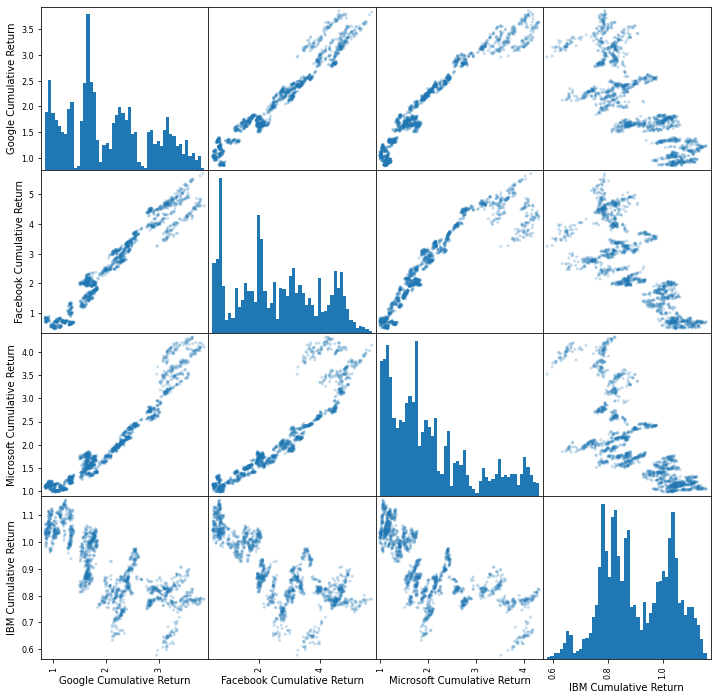

In [101]:
scatter_matrix(company_cumulative_return, figsize=(12,12), hist_kwds={'bins':50}, alpha = 0.25)

In [102]:
company_cumulative_return.to_csv('company_cumulative_return.csv')

# Arima

In [105]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Avarage (q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

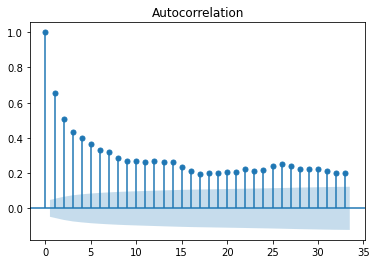

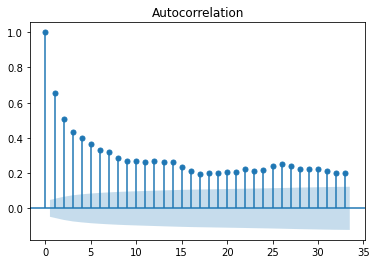

In [118]:
# plot_acf is to identify parameter Q
#ARIMA (p, d, q)

plot_acf(fb['Total Trade'])

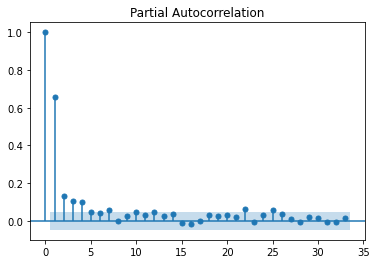

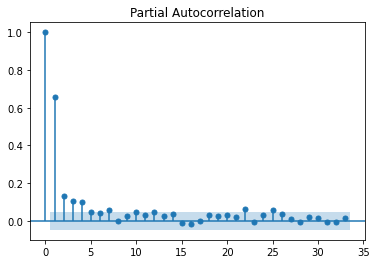

In [116]:
plot_pacf(fb['Total Trade'])